In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import geopandas


%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
debt = pd.read_csv('data/debt.csv', low_memory=False)
debt_df = pd.DataFrame(debt)
pop = pd.read_csv('data/total-population.csv', low_memory=False)
neighborhoods = geopandas.read_file("data/Neighborhoods/Neighborhoods_.shp")

Importing and loading necessary packages and files.

In [4]:
debt.groupby(['Neighborhood'])['Estimate; Total:'].sum().sort_values(ascending=True)


Neighborhood
South Shore               0.0
Arlington Heights         0.0
Glen Hazel                0.0
North Shore               0.0
Chateau                   3.0
                        ...  
Beechview              2065.0
Brighton Heights       2206.0
Carrick                2624.0
Squirrel Hill South    3152.0
Brookline              4245.0
Name: Estimate; Total:, Length: 91, dtype: float64

This data is the estimated total of mortgages, contracts to purchase, or similar debts.

In [5]:
total_mort_df = debt.groupby(['Neighborhood'])['Estimate; Total:'].sum()


In [6]:
total_mort_df.sort_values(ascending=True)

Neighborhood
South Shore               0.0
Arlington Heights         0.0
Glen Hazel                0.0
North Shore               0.0
Chateau                   3.0
                        ...  
Beechview              2065.0
Brighton Heights       2206.0
Carrick                2624.0
Squirrel Hill South    3152.0
Brookline              4245.0
Name: Estimate; Total:, Length: 91, dtype: float64

Here is the brief representation of total debts by neighborhood.

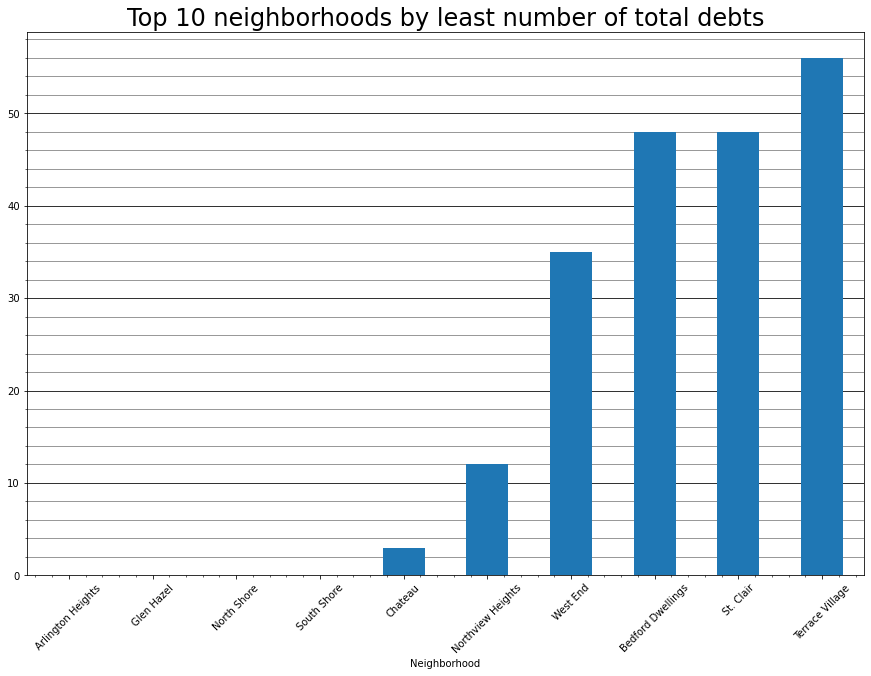

In [7]:
ax1 = total_mort_df.nsmallest(10).sort_values(ascending=True).plot(kind="bar", figsize=(15,10))
ax1.set_xlabel("Neighborhood")
ax1.set_axisbelow(True)
ax1.yaxis.grid(True, color ="black")
ax1.yaxis.grid(True, 'minor', color ="grey")
plt.minorticks_on()
plt.title('Top 10 neighborhoods by least number of total debts', fontdict = {'fontsize': 24})
plt.xticks(rotation=45)
plt.show()

Here is a bar chart showing the 10 neighborhoods with the lowest total amount of loans.

In [8]:
debt_map = neighborhoods.merge(total_mort_df, how='left', left_on='hood', right_on='Neighborhood')

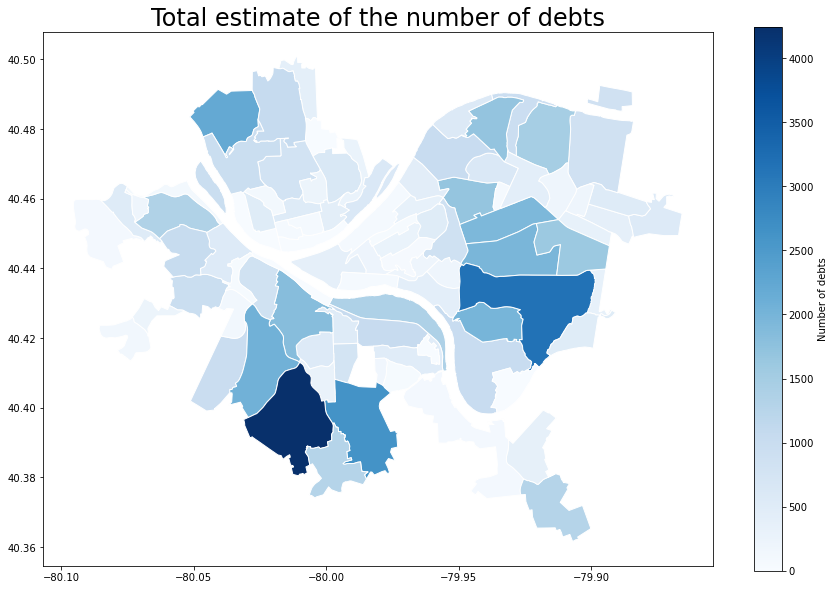

In [9]:
fig2, ax2 = plt.subplots(figsize=(15, 10))
debt_map.plot(column='Estimate; Total:',
                cmap='Blues',
                edgecolor="white",
                legend=True, 
                legend_kwds={'label': "Number of debts"},
                figsize=(15, 10),
                missing_kwds={"color": "lightgrey"},
                ax=ax2
               )
plt.title('Total estimate of the number of debts', fontdict = {'fontsize': 24})
plt.show()

Here is a map showcasing the number of total loans per neighborhood indicated by shade of blue.

Conclusion: The best neighborhoods with no debt are South Shore, Arlington Heights, Glen Hazel, and North Shore. These 4 will get 10 points while the remaining will get the regular point scheme of 5 points for 5th, 4 points for 6th, etc until 1 point for 10th.